In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyhdfs import HdfsClient
from pyspark import SparkContext
client = HdfsClient(hosts="192.168.18.99:50070", user_name='root')

file=client.listdir("/abc")
print(file)

with 

# data = pd.DataFrame(data=data)

# print(data.shape)
# data.head()

['master.csv']


In [21]:
from IPython.display import Image

In [6]:
data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [7]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [11]:
data[['suicides_no','population','suicides/100k pop','gdp_per_capita ($)']].describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


In [12]:
data.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [13]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [14]:
data = data.drop(['country-year','HDI for year'],axis=1)

In [15]:
data.sample(frac=0.1)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
2268,Azerbaijan,1998,female,55-74 years,4,491600,0.81,"4,446,396,218",631,Silent
22984,Slovakia,2009,female,25-34 years,6,453130,1.32,"88,945,625,174",17299,Generation X
1802,Austria,1986,female,75+ years,110,345431,31.84,"99,036,165,210",13911,G.I. Generation
8159,El Salvador,1998,female,55-74 years,5,282668,1.77,"10,936,669,900",2185,Silent
19828,Puerto Rico,1997,male,15-24 years,37,315165,11.74,"48,187,039,000",14037,Generation X
9885,Germany,2004,female,35-54 years,827,12631907,6.55,"2,819,245,095,605",35772,Boomers
7835,Ecuador,1996,female,75+ years,2,111706,1.79,"25,226,393,197",2474,G.I. Generation
2257,Azerbaijan,1997,female,15-24 years,6,628600,0.95,"3,962,710,163",590,Generation X
18426,Panama,2004,female,25-34 years,9,268312,3.35,"15,013,381,700",5144,Generation X
16532,Mauritius,2014,male,35-54 years,41,179164,22.88,"12,803,445,934",11120,Generation X


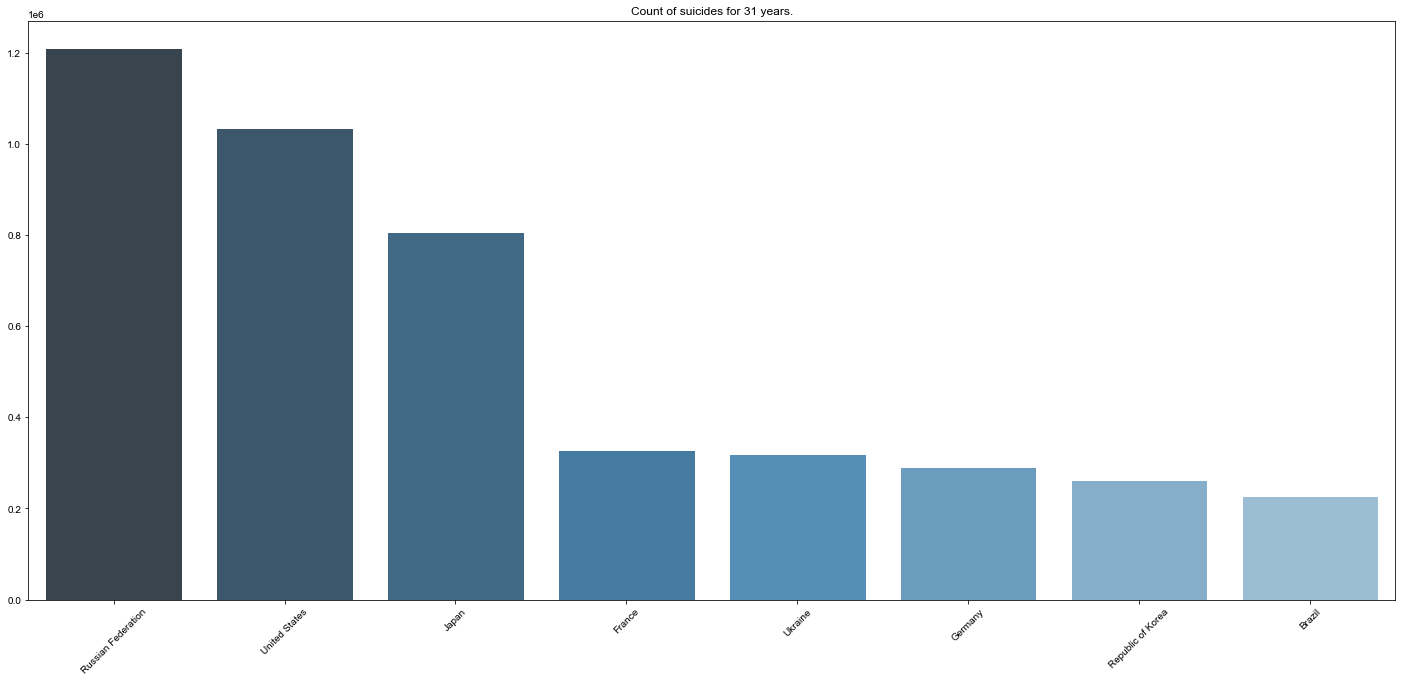

In [16]:
suic_sum = pd.DataFrame(data['suicides_no'].groupby(data['country']).sum())
suic_sum = suic_sum.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont = suic_sum.head(8)
fig = plt.figure(figsize=(20,10))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='country',data=most_cont,palette="Blues_d")
plt.xticks(rotation=45)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()



In [17]:
#

In [18]:
gps = pd.read_csv('concap.csv')
gps.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [19]:
# check df against gps
count = 0
for i in sorted(data.country.unique()):
    if len(gps.CountryName[gps.CountryName == i].values) == 0:
        print('MISSING in gps:  df: {}\t\tgps:{}'.format(i,gps.CountryName[gps.CountryName == i].values))
        count = count + 1
print('check complete:  {} missing'.format(count)) 

#  update names in df to match the gps file

MISSING in gps:  df: Cabo Verde		gps:[]
MISSING in gps:  df: Republic of Korea		gps:[]
MISSING in gps:  df: Russian Federation		gps:[]
MISSING in gps:  df: Saint Vincent and Grenadines		gps:[]
check complete:  4 missing


In [20]:
#Image('country/missed countries.png')

In [21]:
from mpl_toolkits.basemap import Basemap
#concap = pd.read_csv('concap.csv')
#concap.head()

In [22]:
#! conda install basemap


In [23]:
from IPython.display import Image
#Image('missed countries.png')

In [24]:
def reg(x):
    if x=='Russia':
        res = 'Russian Federation'
    else:
        res=x
    return res
gps['CountryName'] = gps['CountryName'].apply(reg)

data_full = pd.merge(gps[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         suic_sum,left_on='CountryName',right_on='country')

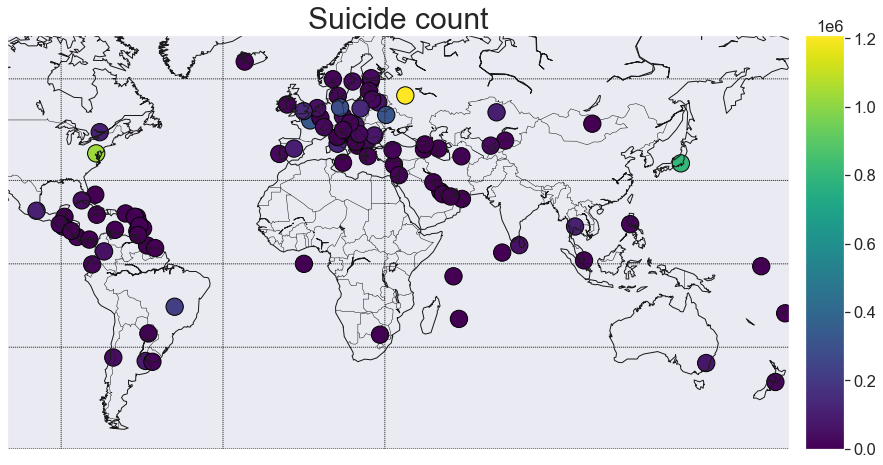

In [25]:
def mapWorld(col1,size2,title3,label4,metr=100,colmap='SC'):
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=70,llcrnrlon=-110,urcrnrlon=180,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    
    lat = data_full['CapitalLatitude'].values
    lon = data_full['CapitalLongitude'].values
    a_1 = data_full[col1].values
    if size2:
        a_2 = data_full[size2].values
    else: a_2 = 1
    m.scatter(lon, lat, latlon=True,c=a_1,s=metr*a_2,linewidth=1,edgecolors='black',cmap=colmap, alpha=1)
    
    cbar = m.colorbar()
    cbar.set_label(label4,fontsize=30)
    plt.title(title3, fontsize=30)
    plt.show()
sns.set(font_scale=1.5)
plt.figure(figsize=(15,15))
mapWorld(col1='suicides_no', size2=False,title3='Suicide count',label4='',metr=300,colmap='viridis')

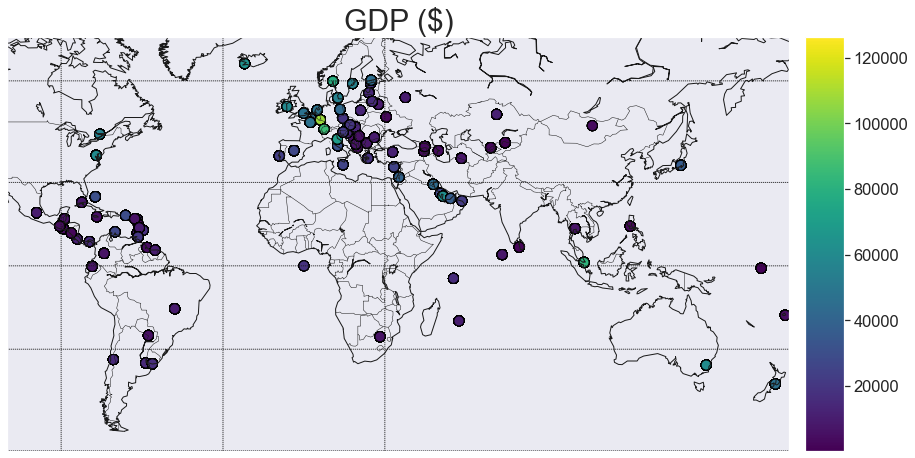

In [26]:
data_full = pd.merge(gps[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         data,left_on='CountryName',right_on='country')
plt.figure(figsize=(15,15))
mapWorld(col1='gdp_per_capita ($)', size2=False,title3='GDP ($)',label4='',metr=100,colmap='viridis')

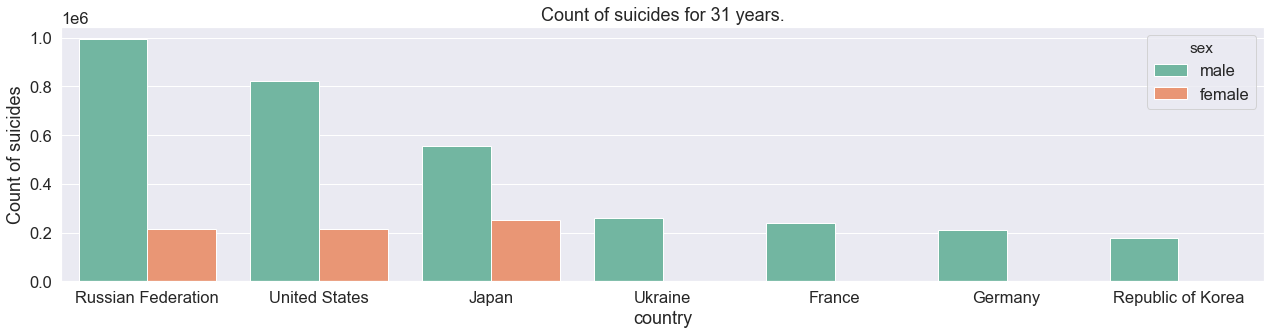

In [27]:
suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum()
suic_sum_m = suic_sum_m.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont_m = suic_sum_m.head(10)
most_cont_m.head(10)
fig = plt.figure(figsize=(18,5))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale=1.5)
sns.barplot(y='suicides_no',x='country',hue='sex',data=most_cont_m,palette='Set2');
plt.ylabel('Count of suicides')
plt.tight_layout()

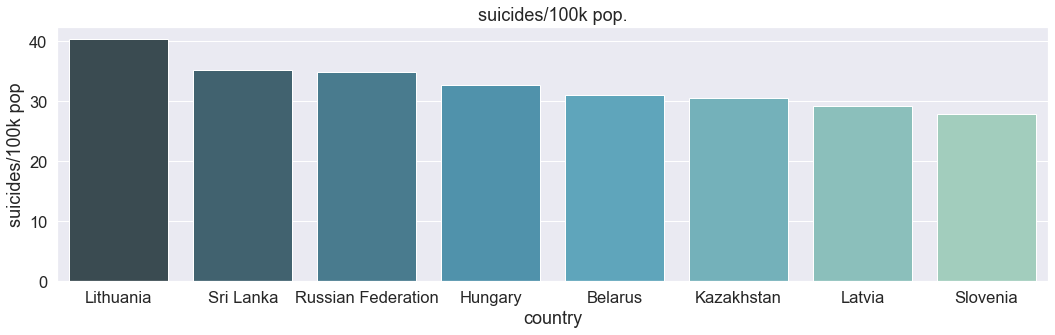

In [28]:
suic_mean = pd.DataFrame(data['suicides/100k pop'].groupby(data['country']).mean())
suic_mean = suic_mean.reset_index()
suic_mean_most = suic_mean.sort_index(by='suicides/100k pop',ascending=False).head(8)

fig = plt.figure(figsize=(15,5))
plt.title('suicides/100k pop.')
#sns.set(font_scale=1.5)
sns.barplot(y='suicides/100k pop',x='country',data=suic_mean_most,palette="GnBu_d");
plt.ylabel('suicides/100k pop')
plt.tight_layout()

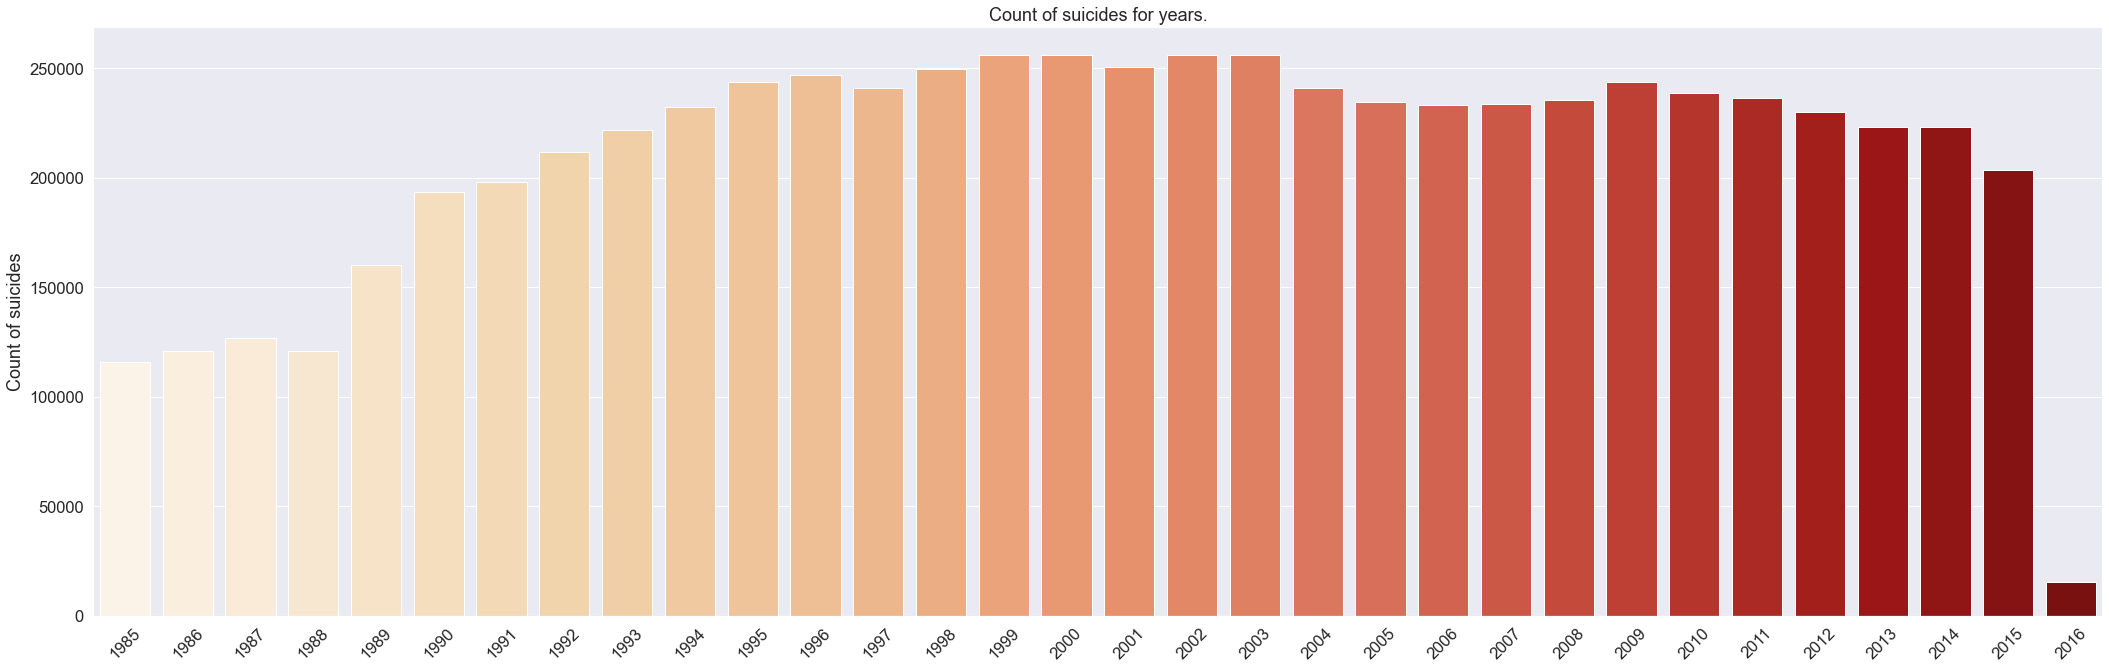

In [29]:
suic_sum_yr = pd.DataFrame(data['suicides_no'].groupby(data['year']).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont_yr = suic_sum_yr
fig = plt.figure(figsize=(30,10))
plt.title('Count of suicides for years.')
sns.set(font_scale=2.5)
sns.barplot(y='suicides_no',x='year',data=most_cont_yr,palette="OrRd");
plt.ylabel('Count of suicides')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()

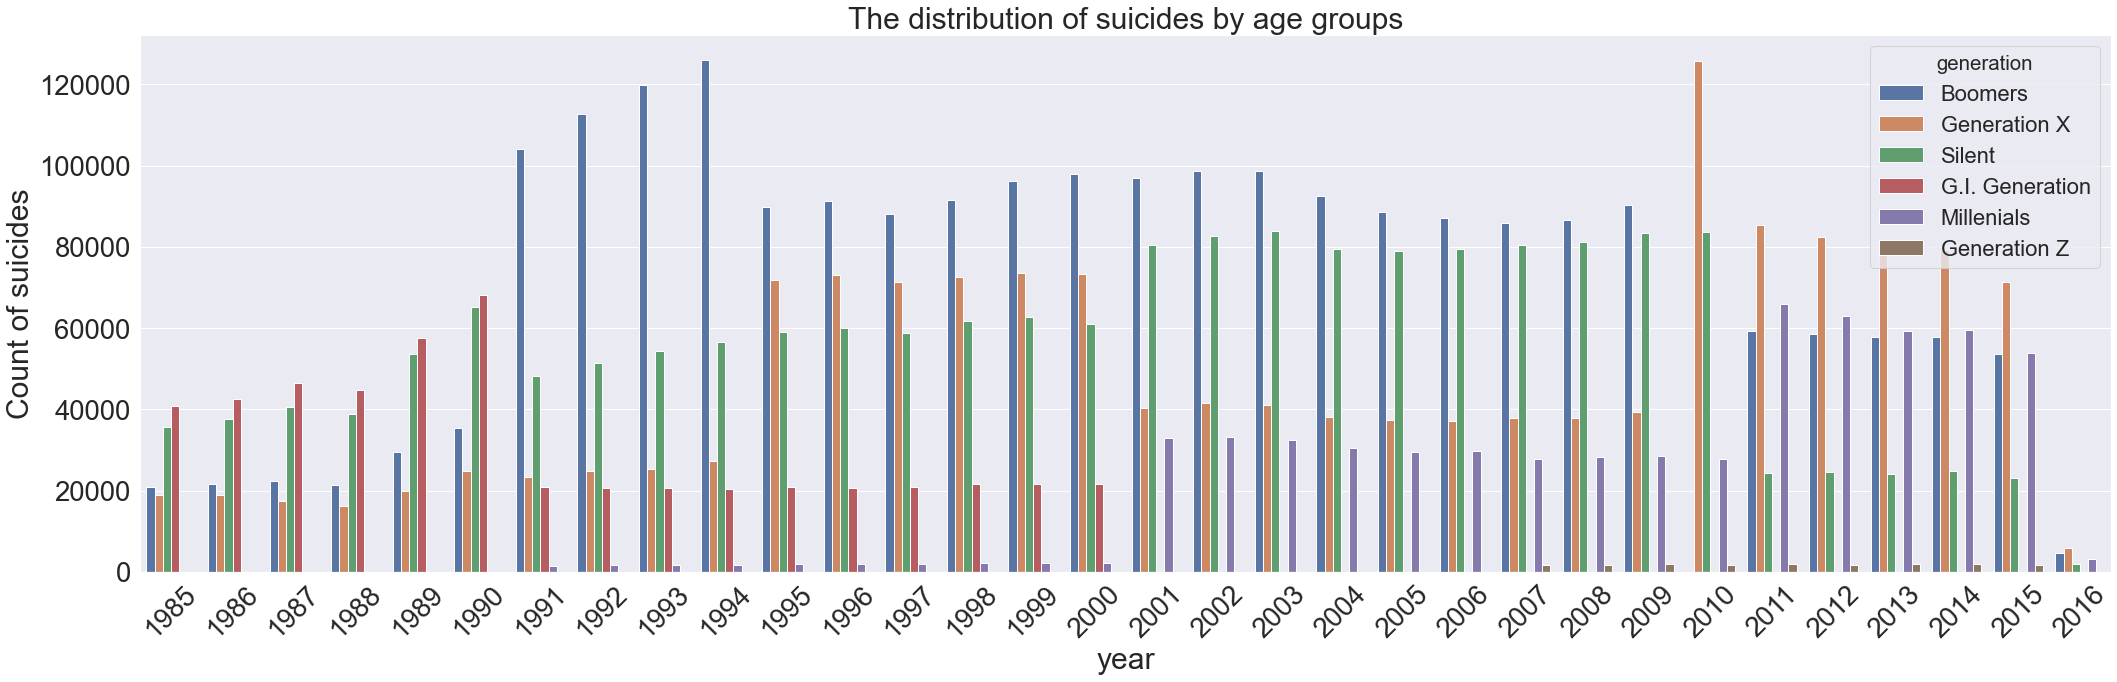

In [30]:
suic_sum_yr = pd.DataFrame(data['suicides_no'].groupby([data['generation'],data['year']]).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont_yr = suic_sum_yr
fig = plt.figure(figsize=(30,10))
plt.title('The distribution of suicides by age groups')

sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='year',hue='generation',data=most_cont_yr,palette='deep');
plt.ylabel('Count of suicides')
plt.xticks(rotation=45)
plt.tight_layout()


,country,suicides/100k pop
0,Lithuania,40.415573
1,Sri Lanka,35.295152
2,Russian Federation,34.892377
3,Hungary,32.761516
4,Belarus,31.075913
5,Kazakhstan,30.511282
6,Latvia,29.259325
7,Slovenia,27.827857
8,Estonia,27.276905
9,Ukraine,26.582321


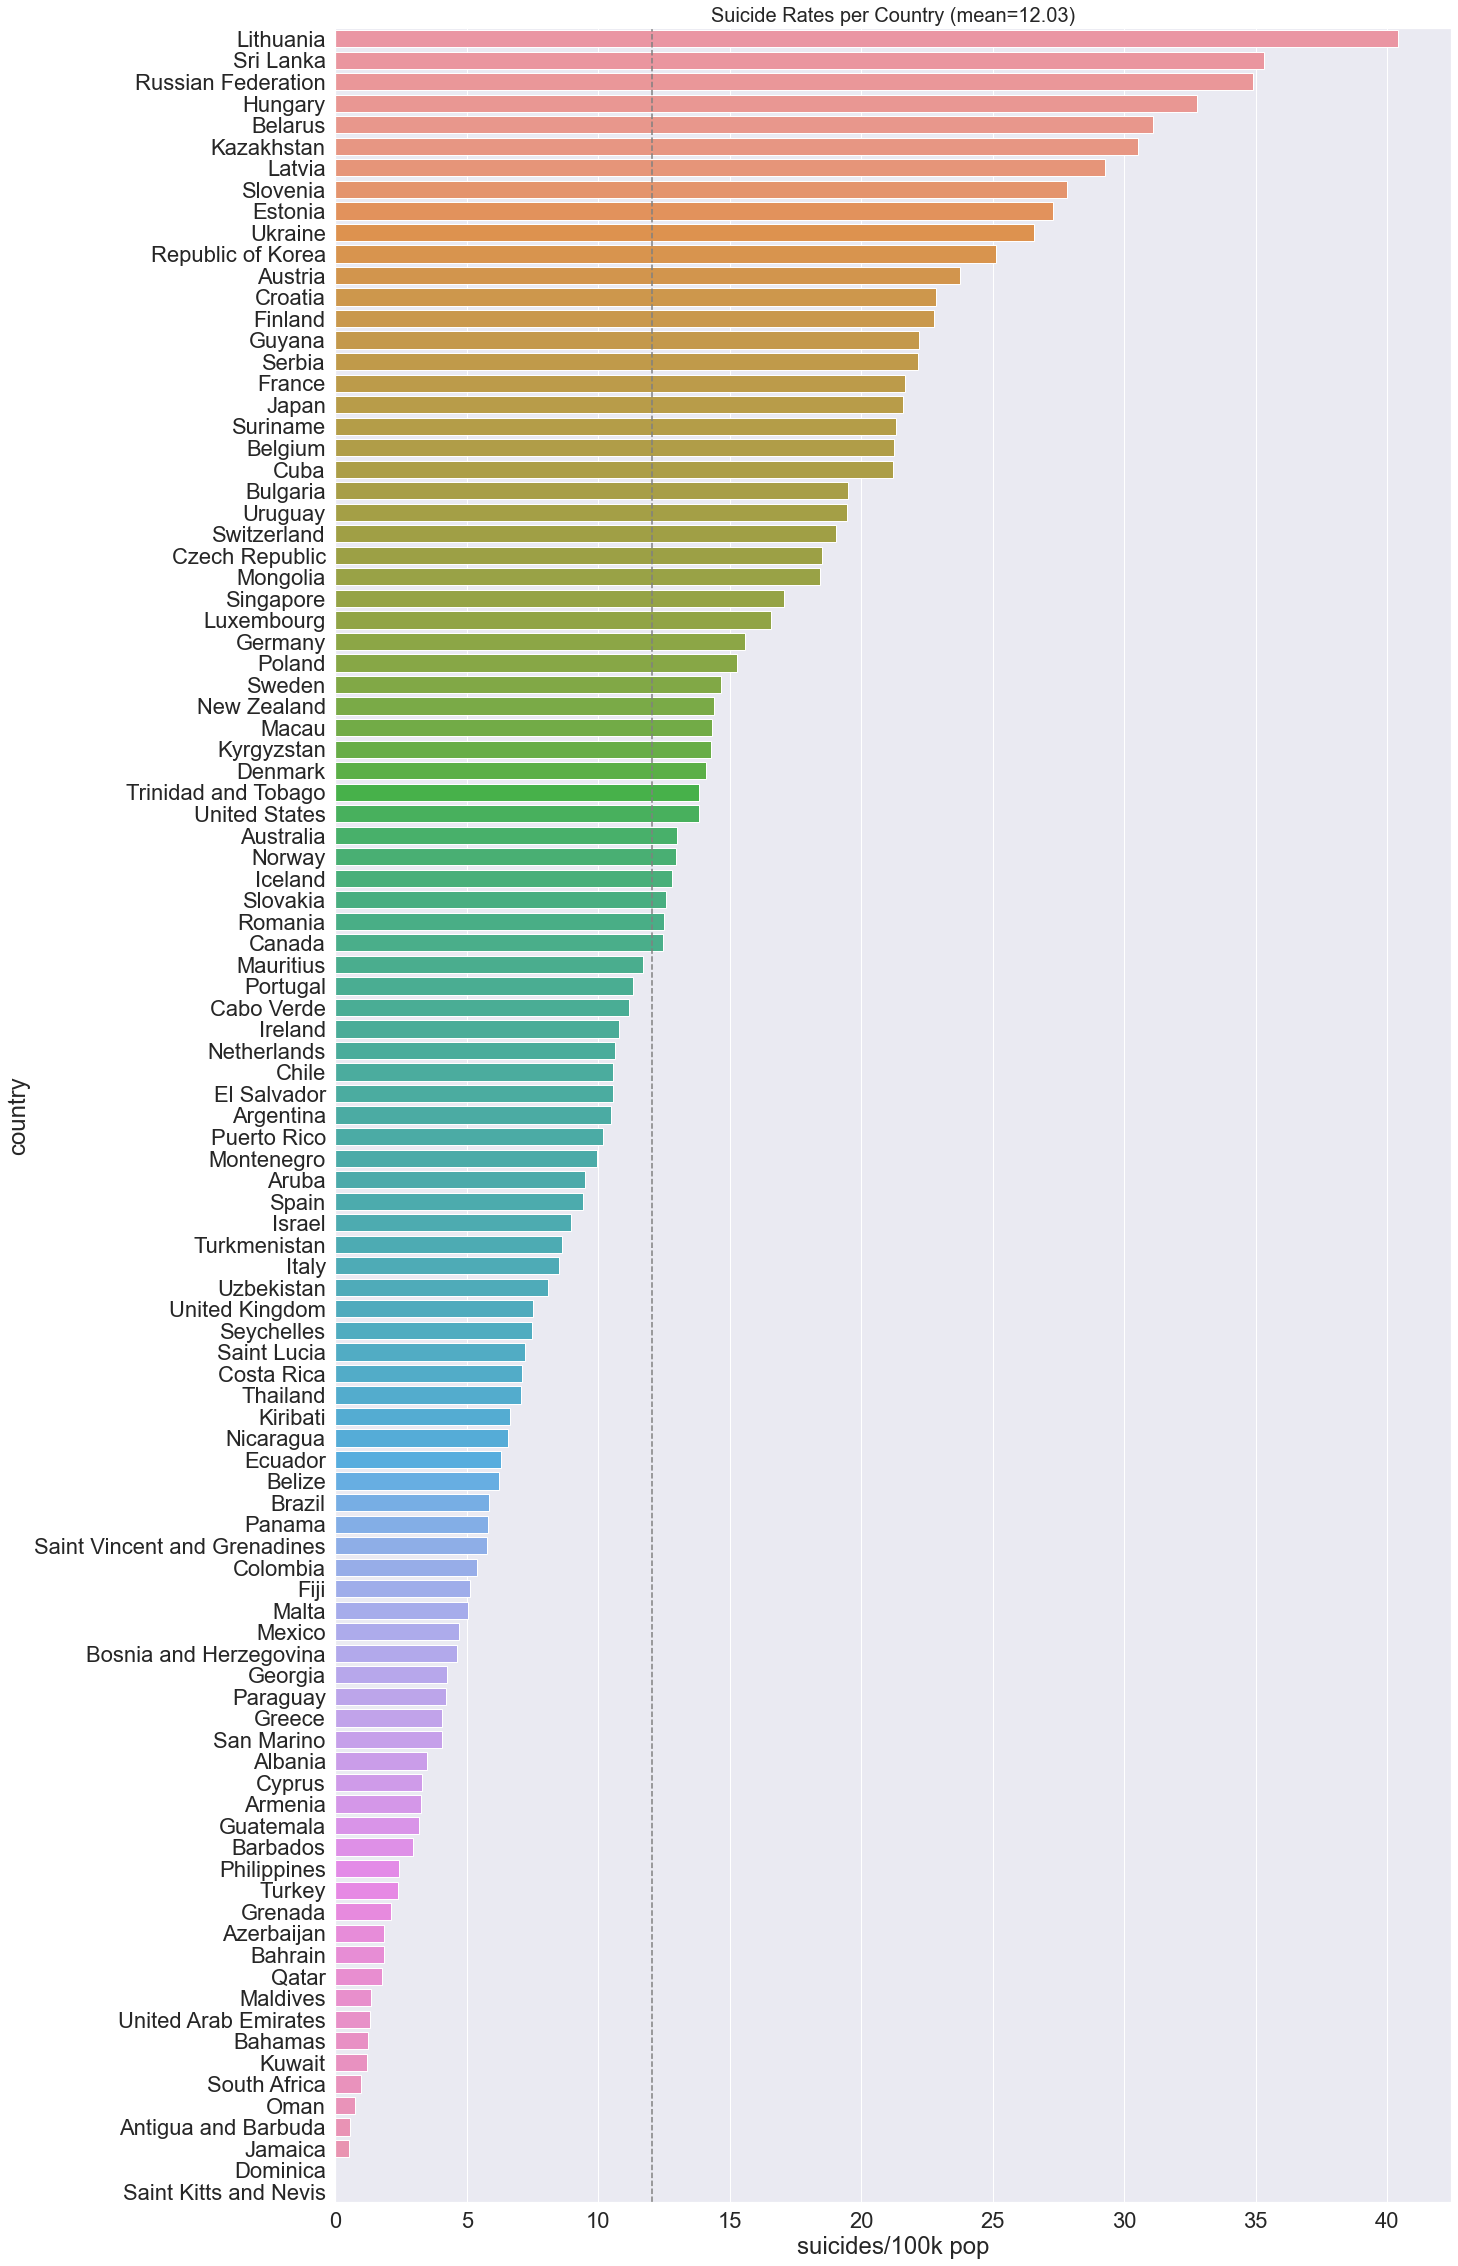

In [31]:
suicideRate = data['suicides/100k pop'].groupby(data['country']).mean().sort_values(ascending=False).reset_index()
suicideMean = suicideRate['suicides/100k pop'].mean()

plt.figure(figsize=(20,40))
plt.title('Suicide Rates per Country (mean={:.2f})'.format(suicideMean), fontsize=20)
plt.axvline(x=suicideMean,color='gray',ls='--')
sns.barplot(data=suicideRate, y='country',x='suicides/100k pop')

suicideRate.head(20)

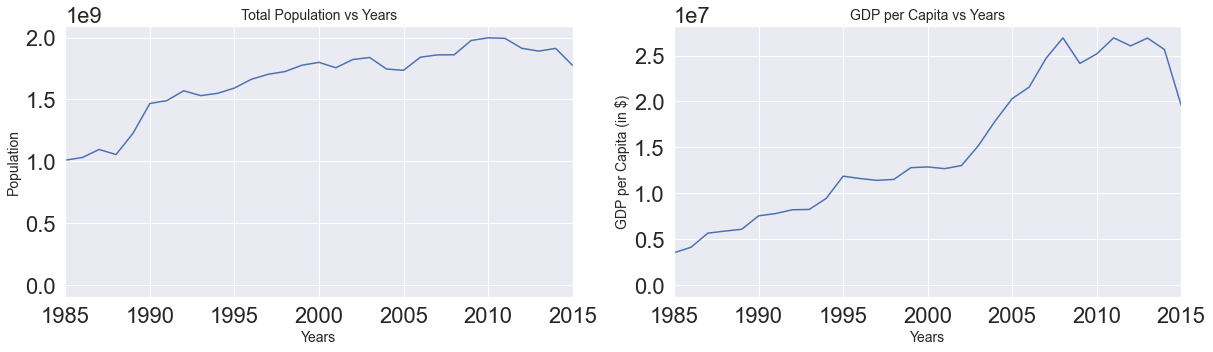

In [32]:
YRS = sorted(data.year.unique()-1)  # not including 2016 data
POP = []    # population
GDC = []    # gdp_per_capita ($)
SUI = []    # suicides_no
SUR = []    # suicides/100k pop

for year in sorted(YRS):
    POP.append(data[data['year']==year]['population'].sum())
    GDC.append(data[data['year']==year]['gdp_per_capita ($)'].sum())
    SUI.append(data[data['year']==year]['suicides_no'].sum())
    SUR.append(data[data['year']==year]['suicides/100k pop'].sum())

#  plot population and gdp_per_capita ($), 1985-2015
fig = plt.figure(figsize=(20,5))
fig.add_subplot(121)
plt.title('Total Population vs Years', fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.axis('on')
plt.xlim(1985,2015)
plt.grid(c='w')
plt.plot(YRS,POP)
fig.add_subplot(122)
plt.title('GDP per Capita vs Years', fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.ylabel('GDP per Capita (in $)', fontsize=14)
plt.xlim(1985,2015)
plt.grid(c='w')
plt.plot(YRS,GDC)
plt.show()

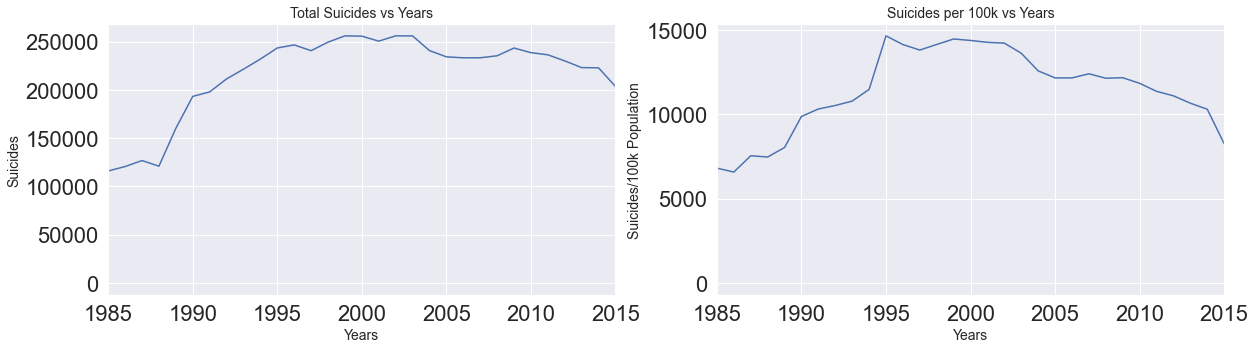

In [33]:
##  plot suicides_no and suicides/100k pop, 1985-2015
fig = plt.figure(figsize=(20,5))
fig.add_subplot(121)
plt.title('Total Suicides vs Years', fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Suicides', fontsize=14)
plt.xlim(1985,2015)
plt.grid(c='w')
plt.plot(YRS,SUI)
fig.add_subplot(122)
plt.title('Suicides per 100k vs Years', fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Suicides/100k Population', fontsize=14)
plt.xlim(1985,2015)
plt.grid(c='w')
plt.plot(YRS,SUR)
plt.show()

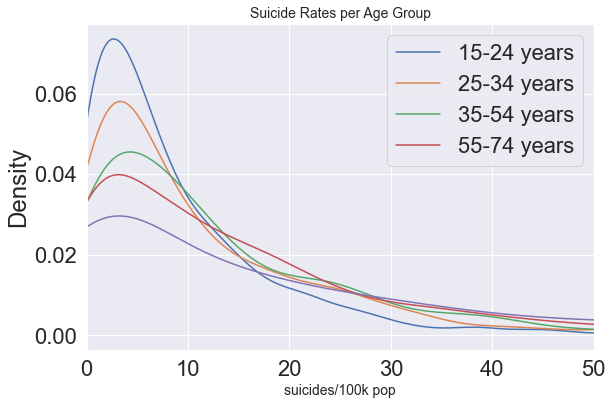

In [34]:
ageList = sorted(data.age.unique())
ageList.remove('5-14 years')
fig = plt.figure(figsize=(20,6))

for i in ageList:
    fig.add_subplot(121)
    plt.title('Suicide Rates per Age Group', fontsize=14)
    plt.xlabel('suicides/100k pop', fontsize=14)
    plt.xlim(0,50)
    plt.legend(ageList)
    data['suicides/100k pop'][data['age'] == i].plot(kind='kde')

In [54]:
#Now start analysis, min year and max year will find them
minyear=min(data.year)
maxyear=max(data.year)
print('Min Year :',minyear)
print('Max Year :',maxyear)


Min Year : 1985
Max Year : 2016


In [55]:
datacountry=data[(data['year']==minyear)]

suicideGender1985=datacountry.groupby(['country','sex']).suicides_no.sum()

suicideGender1985

country                       sex   
Antigua and Barbuda           female        0
                              male          0
Argentina                     female      538
                              male       1450
Australia                     female      425
                              male       1436
Austria                       female      624
                              male       1467
Bahamas                       female        0
                              male          1
Bahrain                       female        1
                              male         10
Barbados                      female        2
                              male          5
Belgium                       female      759
                              male       1522
Brazil                        female     1066
                              male       3162
Bulgaria                      female      422
                              male       1034
Canada                        female      6

In [65]:
grouop_data=data.groupby(['age','sex'])['suicides_no'].sum().unstack()
grouop_data=grouop_data.reset_index().melt(id_vars='age')

grouopdata_female=grouop_data.iloc[:6,:]
grouopdata_male=grouop_data.iloc[6:,:]

grouopdata_male

,age,sex,value
6,15-24 years,male,633105
7,25-34 years,male,915089
8,35-54 years,male,1945908
9,5-14 years,male,35267
10,55-74 years,male,1228407
11,75+ years,male,431134


In [66]:
grouopdata_female

,age,sex,value
0,15-24 years,female,175437
1,25-34 years,female,208823
2,35-54 years,female,506233
3,5-14 years,female,16997
4,55-74 years,female,430036
5,75+ years,female,221984


In [60]:
!pip install pymongo

     |████████████████████████████████| 378kB 6.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [61]:
!pip install --upgrade pip

     |████████████████████████████████| 1.5MB 4.4MB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [62]:
!pip install pymongo

In [63]:
!pip install --upgrade pymongo

Requirement already up-to-date: pymongo in ./anaconda3/lib/python3.6/site-packages (3.11.0)


In [64]:
!pip install hdfs

     |████████████████████████████████| 41 kB 1.3 MB/s eta 0:00:011
  Created wheel for hdfs: filename=hdfs-2.5.8-py3-none-any.whl size=34724 sha256=5101f225a2953251d02ef6cb00dd84fa1c02a4a7c198ce6a94762b91a0b5f929
  Stored in directory: /Users/lifengze/Library/Caches/pip/wheels/3e/0c/c3/26ad975f80274d6bf73ed4d8facd055648f452428bc1623283
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=19886 sha256=8ff9a0b5a4bbe888cc71325efca9f1604036786cc1ec3691f0bc6b5ec7c256a4
  Stored in directory: /Users/lifengze/Library/Caches/pip/wheels/3f/2a/fa/4d7a888e69774d5e6e855d190a8a51b357d77cc05eb1c097c9
Successfully built hdfs docopt
